In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import (Optional, Tuple, Union)

In [27]:
df = pd.read_csv('../results/cliff_results_a129_27-07-2023_11:36:31.csv').rename(columns=lambda x: x.strip())

In [28]:
results = df.groupby(['iters', 'train_size', 'test_size'], as_index=False).agg({'pval':['mean','std'], 'time':['mean', 'std']})
results.columns = ['iters', 'train_size', 'test_size',
                   'pval_mean', 'pval_std', 'time_mean', 'time_std']

In [77]:
def plot_performance(x: str,
                    iters: Optional[Union[int, Tuple[int, int]]] = None,
                    train_size: Optional[Union[int, Tuple[int, int]]] = None,
                    test_size: Optional[Union[int, Tuple[int, int]]] = None,
                   ):
    iters_filter = (results['iters'].notnull()
                    if iters is None
                    else (results['iters'] == iters
                          if isinstance(iters, int)
                          else ( (iters[0] <= results['iters']) & (results['iters'] <= iters[1]) ))
                   )
    train_filter = (results['train_size'].notnull()
                    if train_size is None
                    else (results['train_size'] == train_size
                          if isinstance(train_size, int)
                          else ( (train_size[0] <= results['train_size']) & (results['train_size'] <= train_size[1]) ))
                   )
    test_filter = (results['test_size'].notnull()
                   if test_size is None
                   else (results['test_size'] == test_size
                         if isinstance(test_size, int)
                         else ( (test_size[0] <= results['test_size']) & (results['test_size'] <= test_size[1]) ))
                  )
    df = results[iters_filter & train_filter & test_filter]
    fig, [pvax, tiax] = plt.subplots(ncols=2, figsize=(12, 6))
    pvax.axhline(y=0.01, color='black', dashes=(1,1))
    tiax.axhline(y=2, color='black', dashes=(1,1))
    dim1, dim2 = filter(lambda d: d != x, ["iters", "train_size", "test_size"])
    vals1 = set(df[dim1])
    vals2 = set(df[dim2])
    for v1 in vals1:
        for v2 in vals2:
            df[ (df[dim1] == v1) & (df[dim2] == v2) ].plot(
                ax = pvax,
                x = x,
                y = 'pval_mean',
                yerr = 'pval_std',
                ylim = (0.00002, 0.5),
                logy = True,
                label = f"{dim1}({v1}), {dim2}({v2})",
                legend=False
            )
            df[ (df[dim1] == v1) & (df[dim2] == v2) ].plot(
                ax = tiax,
                x = x,
                y = 'time_mean',
                yerr = 'time_std',
                ylim = (0, 20),
                label = f"{dim1}({v1}), {dim2}({v2})"
            )

# Varying Iterations

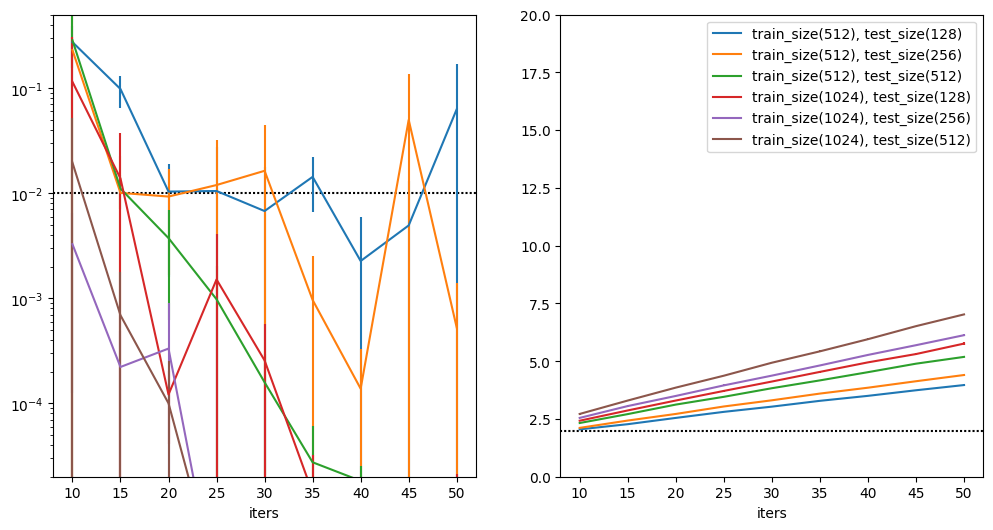

In [84]:
plot_performance(x='iters', iters=(10,50), train_size=(512,1024), test_size=(128, 512))

# Varying Train Data

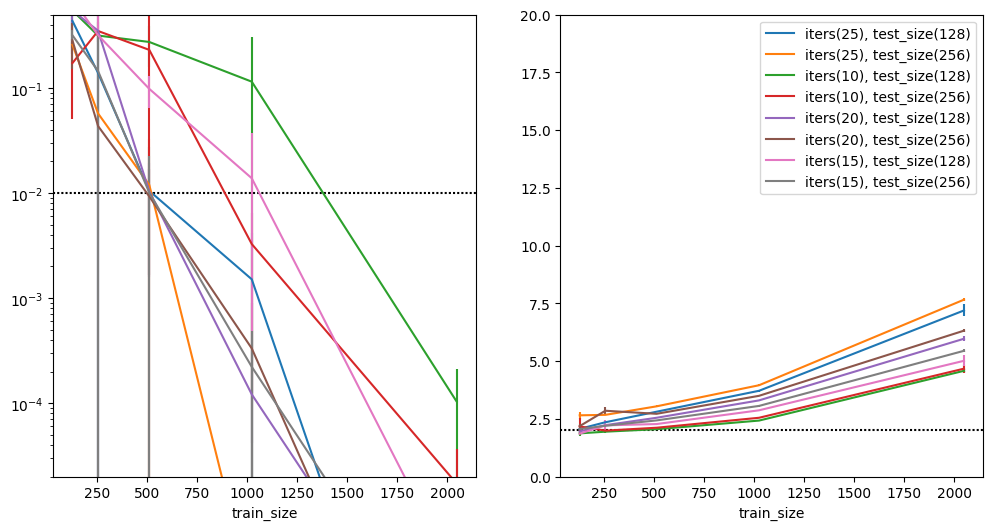

In [87]:
plot_performance(x="train_size", train_size=(0, 2048), iters=(10,25), test_size=(0,256))

# Varying Test Data

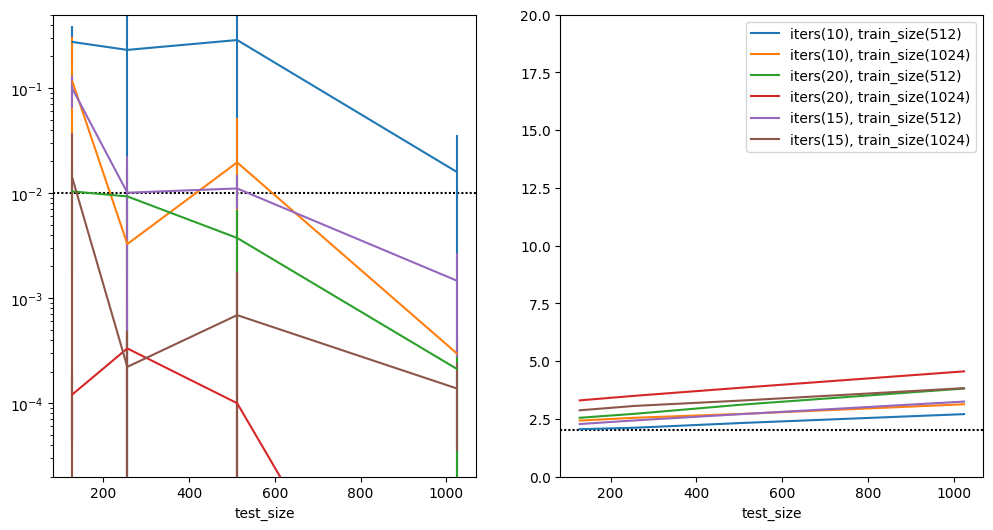

In [88]:
plot_performance(x="test_size", test_size=(0,1024), train_size=(512, 1024), iters=(10,20))

# Sorting by Pval and Time

In [41]:
# Top-20 p-values
results.sort_values('pval_mean').head(20)

,iters,train_size,test_size,pval_mean,pval_std,time_mean,time_std
767,60,16384,16384,1.879709e-194,0.000000e+00,139.735581,0.577029
766,60,16384,8192,5.959023e-186,0.000000e+00,105.695233,0.562816
765,60,16384,4096,1.563855e-176,0.000000e+00,88.640815,0.424273
703,55,16384,16384,1.276047e-173,0.000000e+00,128.490270,0.899301
702,55,16384,8192,2.020935e-160,3.500404e-160,96.790959,0.361931
701,55,16384,4096,1.348027e-159,1.121249e-159,80.893498,0.266822
638,50,16384,8192,2.489046e-156,4.309349e-156,88.220903,0.573968
639,50,16384,16384,1.104415e-155,1.912878e-155,116.913507,0.083470
764,60,16384,2048,1.605936e-154,2.781563e-154,79.871151,0.285364
700,55,16384,2048,7.904090e-146,1.033238e-145,72.987659,0.096563


In [44]:
# Top-100 p-values, sorted by running time
results.sort_values('pval_mean').head(100).sort_values('time_mean').head(10)

,iters,train_size,test_size,pval_mean,pval_std,time_mean,time_std
435,35,8192,1024,1.762520e-63,2.954927e-63,24.270929,0.087875
497,40,8192,256,9.845381e-61,1.697910e-60,25.451746,0.039573
498,40,8192,512,1.132627e-59,1.951819e-59,26.020844,0.027251
499,40,8192,1024,4.054502e-64,7.022604e-64,27.563480,0.082431
561,45,8192,256,9.822161e-62,1.701202e-61,28.470860,0.201601
562,45,8192,512,1.140450e-62,1.975318e-62,29.268888,0.014599
563,45,8192,1024,4.409242e-76,7.060383e-76,30.811145,0.164834
624,50,8192,128,1.108578e-60,1.919553e-60,30.941203,0.097426
625,50,8192,256,2.217312e-63,3.840497e-63,31.476951,0.093439
315,25,16384,1024,9.778152e-59,1.684323e-58,32.112152,0.177172


In [18]:
# Fastest 10 results that achieve p < 0.01
results[results['pval_mean'] + (2 * results['pval_std']) < 0.01].sort_values('time_mean').head(10)

,iters,train_size,test_size,pval_mean,pval_std,time_mean,time_std
89,10,1024,256,3.270281e-03,3.145785e-03,2.546078,0.022933
35,5,2048,1024,5.153539e-04,4.770343e-04,2.967961,0.079616
153,15,1024,256,2.216600e-04,2.622614e-04,3.058994,0.028924
210,20,512,512,3.738648e-03,3.117108e-03,3.122837,0.011349
91,10,1024,1024,2.980982e-04,3.065551e-05,3.130950,0.019621
147,15,512,1024,1.467635e-03,1.190978e-03,3.245949,0.005078
40,5,4096,128,5.103796e-07,8.132613e-07,3.251868,0.010676
41,5,4096,256,5.720967e-04,7.662662e-04,3.287781,0.033525
154,15,1024,512,6.885094e-04,1.089285e-03,3.297754,0.020745
216,20,1024,128,1.212158e-04,7.982069e-05,3.298466,0.018681


# Scatter Plot of P-value vs Running Time

In [98]:
def scatterplot(c_col, *, xlims=(None, 1), ylims=(None, None), log_scale=True):
    df.plot.scatter(x='pval', y='time', c=c_col, s=1, sharex=False, cmap="brg")
    if log_scale:
        plt.xscale('log')
        plt.yscale('log')
    plt.xlim(xlims)
    plt.ylim(ylims)
    plt.xlabel('p-value')
    plt.ylabel('running time (s)')
    plt.show()

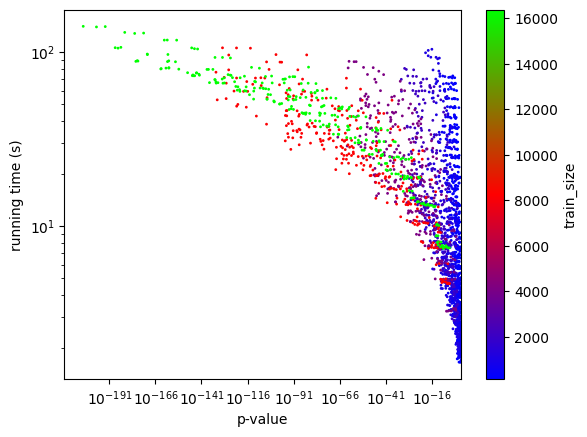

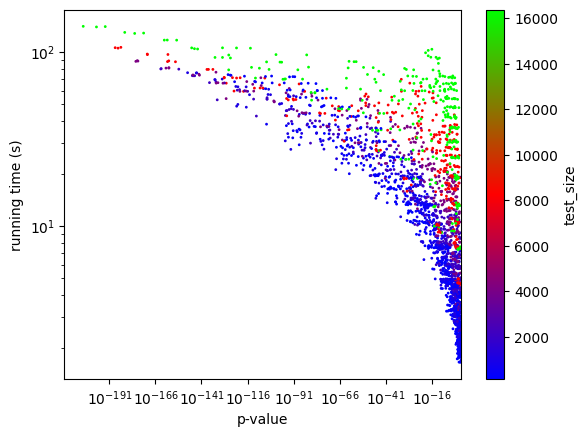

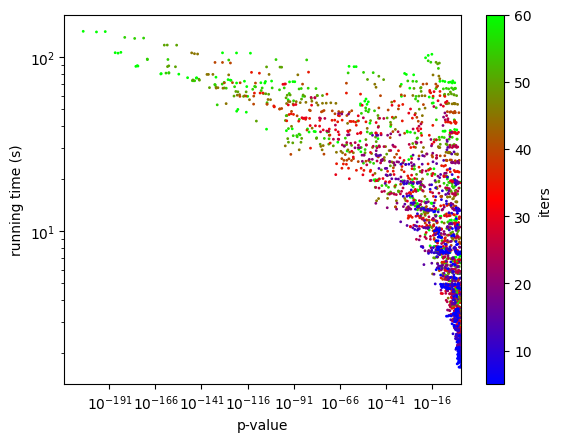

In [99]:
for c_col in ['train_size', 'test_size', 'iters']:
    scatterplot(c_col)

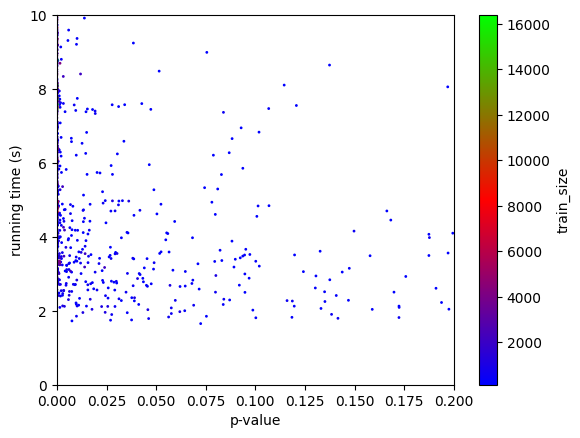

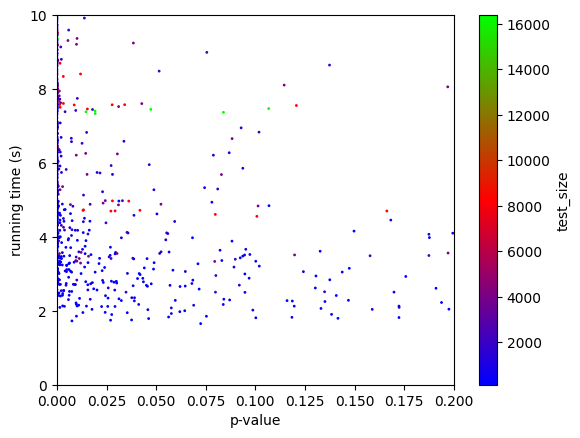

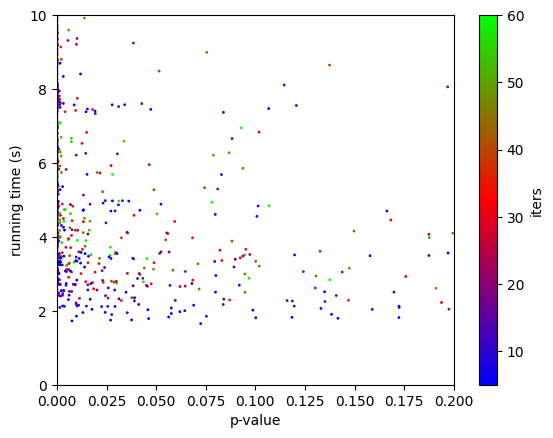

In [102]:
for c_col in ['train_size', 'test_size', 'iters']:
    scatterplot(c_col, xlims=(0, 0.2), ylims=(0,10), log_scale=False)